In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df=pd.read_csv("lung_cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df.shape

(309, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
df.describe(include='O')

,GENDER,LUNG_CANCER
count,309,309
unique,2,2
top,M,YES
freq,162,270


In [7]:
df.GENDER.value_counts()

GENDER
M    162
F    147
Name: count, dtype: int64

In [8]:
df.LUNG_CANCER.value_counts()

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

In [9]:
# youth(21) , adult(27), old(40) oldest(60) 
df['age_catgory']=pd.cut(df['AGE'],bins=[21,27,45,60,87],labels=["youth","adult","old","oldest"])

<Axes: xlabel='age_catgory', ylabel='Count'>

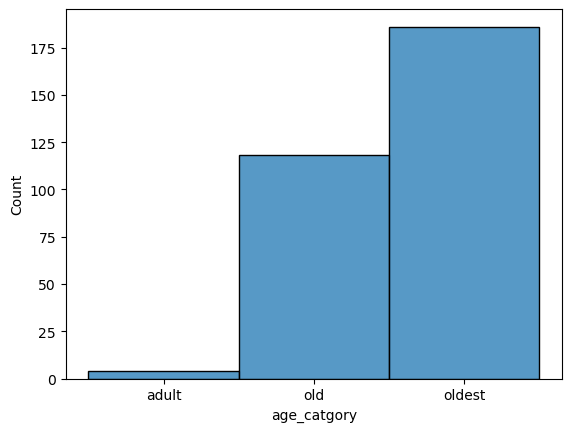

In [10]:
import seaborn as sns
sns.histplot(x=df['age_catgory'])

<Axes: xlabel='LUNG_CANCER', ylabel='Count'>

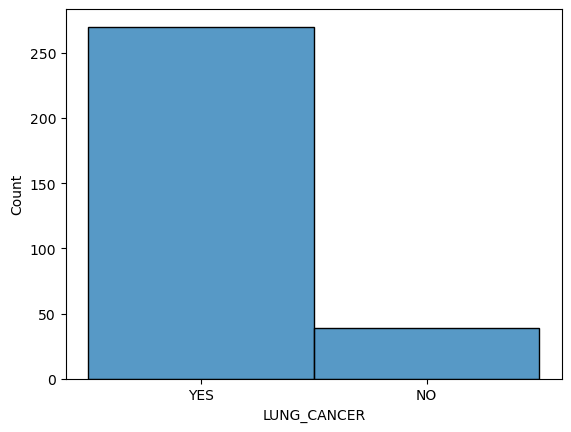

In [12]:
sns.histplot(df['LUNG_CANCER'])

In [13]:
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 

In [14]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'species'. 
df['LUNG_CANCER']= label_encoder.fit_transform(df['LUNG_CANCER']) 
df['age_catgory']=label_encoder.fit_transform(df['age_catgory']) 
df['GENDER']=label_encoder.fit_transform(df['GENDER']) 

In [15]:
X=df.drop(columns=['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

In [16]:
from sklearn.model_selection import train_test_split 
  
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
  

In [17]:
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (216, 16)
Number transactions y_train dataset:  (216,)
Number transactions X_test dataset:  (93, 16)
Number transactions y_test dataset:  (93,)


In [18]:
lr = LogisticRegression() 

In [19]:
# train the model on train set 
lr.fit(X_train, y_train) 
  

C:\Users\ritan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
predictions = lr.predict(X_test) 

In [21]:
# print classification report 
print(classification_report(y_test, predictions)) 
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.83      0.33      0.48        15
           1       0.89      0.99      0.93        78

    accuracy                           0.88        93
   macro avg       0.86      0.66      0.70        93
weighted avg       0.88      0.88      0.86        93

0.9398148148148148
0.8817204301075269


In [22]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  

Before OverSampling, counts of label '1': 192
Before OverSampling, counts of label '0': 24 



In [23]:
!pip install imblearn

In [24]:
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X, y)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\ritan\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

In [25]:
lr1 = LogisticRegression() 
lr1.fit(X_train, y_train) 
predictions = lr1.predict(X_test) 
  

C:\Users\ritan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# print classification report 
print(classification_report(y_test, predictions)) 
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.83      0.33      0.48        15
           1       0.89      0.99      0.93        78

    accuracy                           0.88        93
   macro avg       0.86      0.66      0.70        93
weighted avg       0.88      0.88      0.86        93

0.9398148148148148
0.8817204301075269
